### 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from scipy import stats

In [2]:
#Membaca data
df = pd.read_csv('dataset/6. Student Performance Data.csv')
df.head()

,sex,age,mother_edu,father_edu,mother_job,father_job,traveltime,studytime,school_support,family_support,internet,romantic,freetime,health,absences,grade
0,F,18,4,4,at_home,teacher,2,2,yes,no,no,no,3,3,6,30
1,F,17,1,1,at_home,other,1,2,no,yes,yes,no,3,3,4,30
2,F,15,1,1,at_home,other,1,2,yes,no,yes,no,3,3,10,50
3,F,15,4,2,health,services,1,3,no,yes,yes,yes,2,5,2,75
4,F,16,3,3,other,other,1,2,no,yes,no,no,3,5,4,50


In [3]:
#Membaca Tipe Kolom Pada Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sex             395 non-null    object
 1   age             395 non-null    int64 
 2   mother_edu      395 non-null    int64 
 3   father_edu      395 non-null    int64 
 4   mother_job      395 non-null    object
 5   father_job      395 non-null    object
 6   traveltime      395 non-null    int64 
 7   studytime       395 non-null    int64 
 8   school_support  395 non-null    object
 9   family_support  395 non-null    object
 10  internet        395 non-null    object
 11  romantic        395 non-null    object
 12  freetime        395 non-null    int64 
 13  health          395 non-null    int64 
 14  absences        395 non-null    int64 
 15  grade           395 non-null    int64 
dtypes: int64(9), object(7)
memory usage: 49.5+ KB


In [4]:
#Melihat Jumlah duplikasi baris setiap kolom
df.duplicated().sum()

np.int64(0)

In [5]:
df.isna().sum()

sex               0
age               0
mother_edu        0
father_edu        0
mother_job        0
father_job        0
traveltime        0
studytime         0
school_support    0
family_support    0
internet          0
romantic          0
freetime          0
health            0
absences          0
grade             0
dtype: int64

In [6]:
#Mendeskripsikan Data
round(df.describe(),2)

,age,mother_edu,father_edu,traveltime,studytime,freetime,health,absences,grade
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,3.24,3.55,5.71,52.08
std,1.28,1.09,1.09,0.70,0.84,1.00,1.39,8.00,22.91
min,15.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,3.00,3.00,0.00,40.00
50%,17.00,3.00,2.00,1.00,2.00,3.00,4.00,4.00,55.00
75%,18.00,4.00,3.00,2.00,2.00,4.00,5.00,8.00,70.00
max,22.00,4.00,4.00,4.00,4.00,5.00,5.00,75.00,100.00


In [7]:
numbers = df.select_dtypes(include = ['number']).columns

In [8]:
numbers

Index(['age', 'mother_edu', 'father_edu', 'traveltime', 'studytime',
       'freetime', 'health', 'absences', 'grade'],
      dtype='object')

### 2. visualisasi EDA

In [9]:
# Kategorisasi grade
def categorize_grade(grade):
    if grade >= 85:
        return 'A (Excellent)'
    elif grade >= 70:
        return 'B (Good)'
    elif grade >= 55:
        return 'C (Average)'
    elif grade >= 40:
        return 'D (Below Average)'
    else:
        return 'F (Fail)'

df['grade_category'] = df['grade'].apply(categorize_grade)
grade_dist = df['grade_category'].value_counts()

print("\nDistribusi Kategori Grade:")
print(grade_dist)
print(f"\nPersentase masing-masing kategori:")
for category, count in grade_dist.items():
    print(f"{category}: {count/len(df)*100:.1f}%")


Distribusi Kategori Grade:
grade_category
D (Below Average)    116
C (Average)          109
B (Good)              76
F (Fail)              70
A (Excellent)         24
Name: count, dtype: int64

Persentase masing-masing kategori:
D (Below Average): 29.4%
C (Average): 27.6%
B (Good): 19.2%
F (Fail): 17.7%
A (Excellent): 6.1%


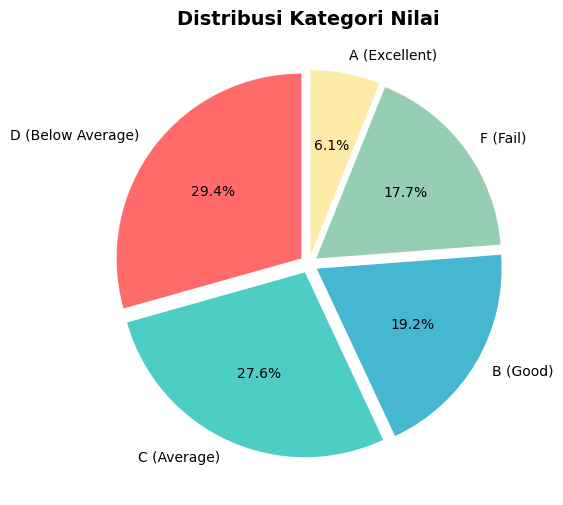

In [10]:
# PIE CHART 
plt.figure(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
plt.pie(grade_dist.values, labels=grade_dist.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, explode=[0.05]*5)
plt.title('Distribusi Kategori Nilai', fontsize=14, fontweight='bold')
plt.show()


##### 
-Sebagian besar siswa berada pada kategori nilai menengah hingga baik, yang menunjukkan performa akademik siswa secara umum cukup positif.

-Secara keseluruhan, distribusi kategori nilai menunjukkan bahwa mayoritas siswa memiliki capaian akademik yang cukup baik, sementara perhatian khusus dapat diberikan kepada kelompok dengan nilai rendah untuk meningkatkan performa mereka.

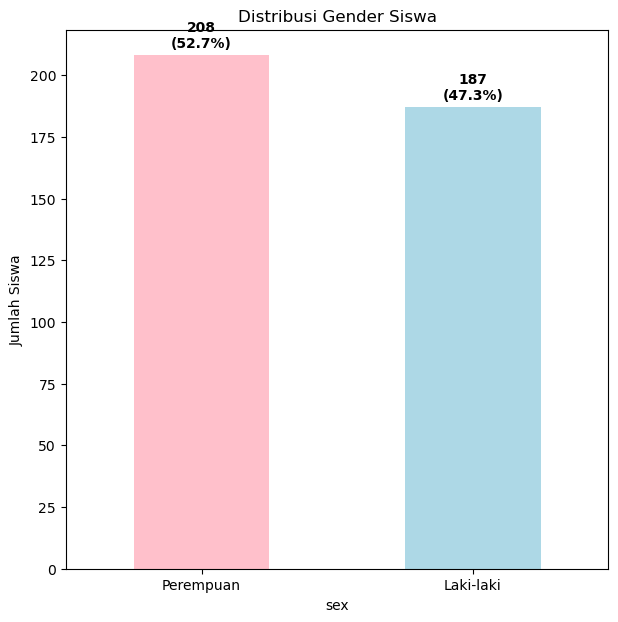

In [11]:
gender_counts = df['sex'].value_counts()
total = len(df)

ax = gender_counts.plot(kind='bar', color=['pink', 'lightblue'], 
                        figsize=(7,7), title='Distribusi Gender Siswa')

plt.xticks([0, 1], ['Perempuan', 'Laki-laki'], rotation=0)
plt.ylabel('Jumlah Siswa')

# Tambahkan jumlah dan persentase di atas batang
for i, count in enumerate(gender_counts):
    percentage = (count / total) * 100
    ax.text(i, count + 2, f'{count}\n({percentage:.1f}%)', 
            ha='center', va='bottom', fontweight='bold')

plt.show()

##### 
-Jumlah siswa perempuan dan laki-laki relatif seimbang, meskipun terdapat sedikit perbedaan jumlah di antara keduanya.

-Distribusi gender yang relatif seimbang menunjukkan bahwa faktor gender kemungkinan bukan sumber bias utama dalam analisis, sehingga fokus analisis dapat diarahkan ke faktor lain seperti waktu belajar, kehadiran, dan fasilitas belajar.

In [12]:
# Korelasi studytime dengan grade
correlation_study = df['studytime'].corr(df['grade'])
print(f"\nKorelasi antara Study Time dan Grade: {correlation_study:.4f}")


Korelasi antara Study Time dan Grade: 0.0978


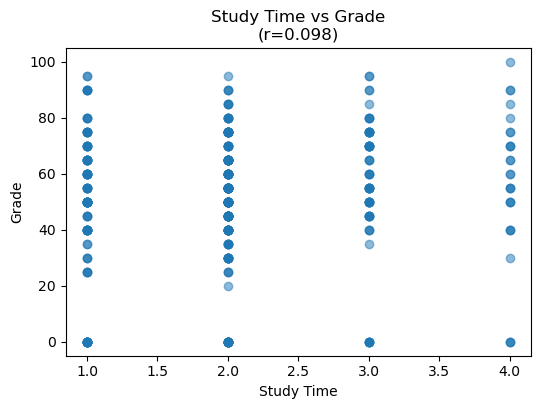

In [13]:
# Simple correlation plot
plt.figure(figsize=(6, 4))
plt.scatter(df['studytime'], df['grade'], alpha=0.5)
plt.title(f'Study Time vs Grade\n(r={correlation_study:.3f})')
plt.xlabel('Study Time'); plt.ylabel('Grade')
plt.show()

/var/folders/gm/hpkzcyy966b9qy96gxsz8z7r0000gn/T/ipykernel_13533/1167247289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='grade', data=df, palette='Greens')


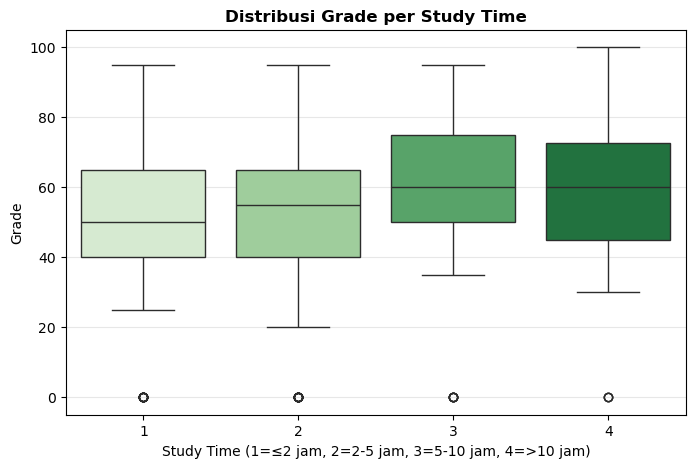

In [14]:
# 4. BOX PLOT PER STUDY TIME
plt.figure(figsize=(8, 5))
sns.boxplot(x='studytime', y='grade', data=df, palette='Greens')
plt.title('Distribusi Grade per Study Time', fontweight='bold')
plt.xlabel('Study Time (1=≤2 jam, 2=2-5 jam, 3=5-10 jam, 4=>10 jam)')
plt.ylabel('Grade')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

####  
HUBUNGAN SANGAT LEMAH

Hanya 0.96% variasi nilai dapat dijelaskan oleh waktu belajar (r² = 0.0978² = 0.00956 ≈ 0.96%)

99.04% dipengaruhi faktor lain


In [15]:
# Korelasi pendidikan orang tua dengan grade
corr_mother = df['mother_edu'].corr(df['grade'])
corr_father = df['father_edu'].corr(df['grade'])
print(f"\nKorelasi Pendidikan dengan Nilai:")
print(f"Korelasi pendidikan ibu dengan grade: {corr_mother:.4f}")
print(f"Korelasi pendidikan ayah dengan grade: {corr_father:.4f}")


Korelasi Pendidikan dengan Nilai:
Korelasi pendidikan ibu dengan grade: 0.2171
Korelasi pendidikan ayah dengan grade: 0.1525


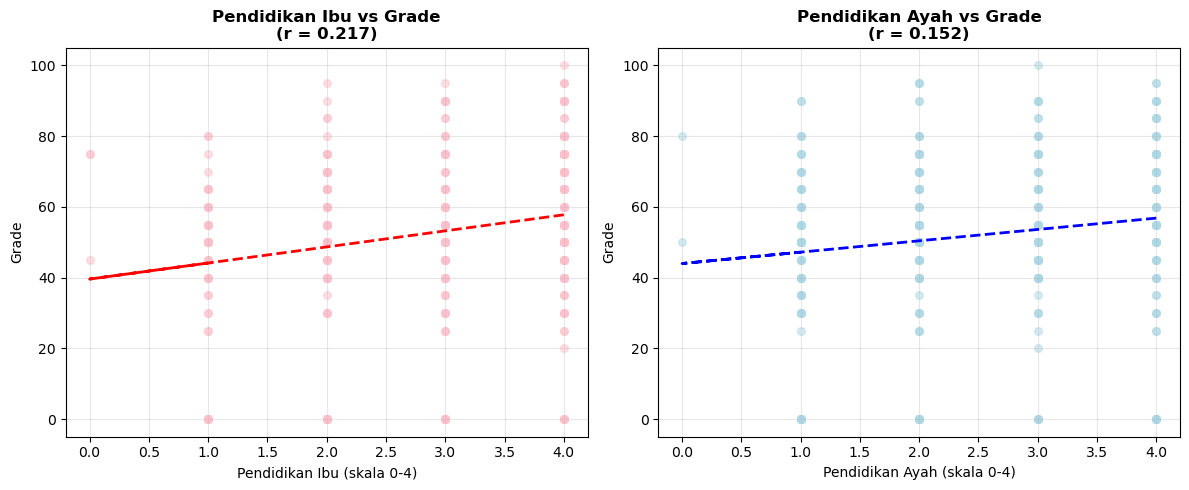

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Pendidikan Ibu vs Grade
ax1.scatter(df['mother_edu'], df['grade'], alpha=0.5, color='pink', s=30)
z1 = np.polyfit(df['mother_edu'], df['grade'], 1)
p1 = np.poly1d(z1)
ax1.plot(df['mother_edu'], p1(df['mother_edu']), "r--", linewidth=2)
ax1.set_title(f'Pendidikan Ibu vs Grade\n(r = {corr_mother:.3f})', fontweight='bold')
ax1.set_xlabel('Pendidikan Ibu (skala 0-4)')
ax1.set_ylabel('Grade')
ax1.grid(True, alpha=0.3)

# Pendidikan Ayah vs Grade
ax2.scatter(df['father_edu'], df['grade'], alpha=0.5, color='lightblue', s=30)
z2 = np.polyfit(df['father_edu'], df['grade'], 1)
p2 = np.poly1d(z2)
ax2.plot(df['father_edu'], p2(df['father_edu']), "b--", linewidth=2)
ax2.set_title(f'Pendidikan Ayah vs Grade\n(r = {corr_father:.3f})', fontweight='bold')
ax2.set_xlabel('Pendidikan Ayah (skala 0-4)')
ax2.set_ylabel('Grade')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### Visualisasi menunjukkan bahwa terdapat hubungan antara tingkat pendidikan orang tua dan nilai siswa. Pendidikan ibu dan ayah sama-sama memiliki korelasi terhadap nilai akademik, namun kekuatannya relatif lemah hingga sedang, yang mengindikasikan bahwa faktor lain juga berperan penting dalam pencapaian nilai siswa.

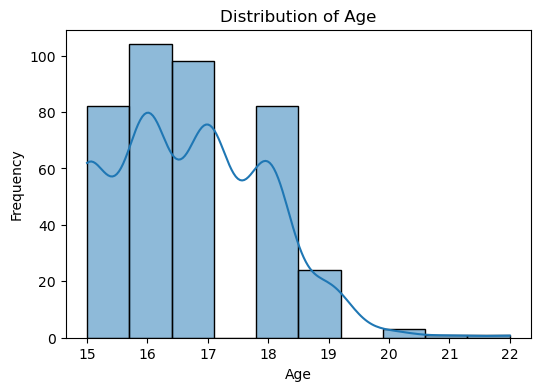

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### 
-Sebaran usia siswa terkonsentrasi pada rentang usia remaja, terutama sekitar 15–18 tahun, yang menunjukkan mayoritas responden berada pada usia sekolah menengah.
-Mayoritas siswa berada pada usia yang hampir sama, sehingga pengaruh usia terhadap nilai kemungkinan lebih kecil dibandingkan faktor lain seperti waktu belajar atau kehadiran.

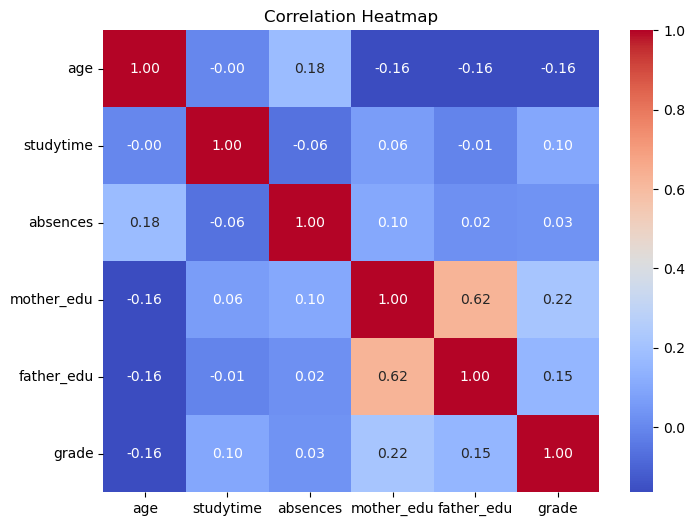

In [18]:
#Heatmap Korelasi Antar Variabel Numerik
plt.figure(figsize=(8,6))
sns.heatmap(df[['age','studytime','absences','mother_edu','father_edu','grade']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### 
-Study time memiliki korelasi positif dengan grade, artinya siswa yang belajar lebih lama cenderung mendapatkan nilai yang lebih baik.

-Absences memiliki korelasi negatif dengan grade, yang berarti semakin sering siswa absen, nilai cenderung menurun.

-Pendidikan ibu dan ayah menunjukkan korelasi positif tetapi lemah terhadap grade, sehingga berpengaruh namun bukan faktor utama.

-Age memiliki korelasi sangat lemah dengan grade, sehingga usia tidak terlalu memengaruhi nilai siswa.

-Performa akademik siswa lebih dipengaruhi oleh perilaku belajar (waktu belajar dan kehadiran) dibandingkan faktor demografis seperti usia dan pendidikan orang tua.


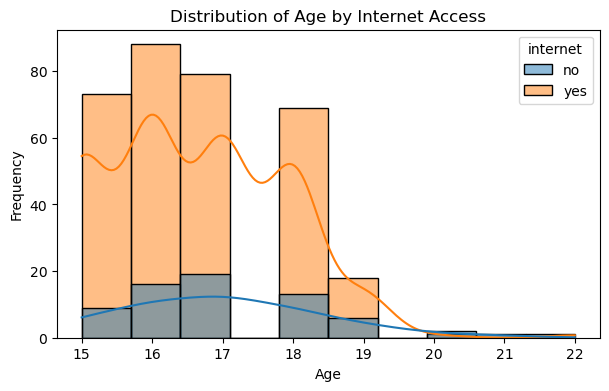

In [19]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='age', hue='internet', bins=10, kde=True)
plt.title('Distribution of Age by Internet Access')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### 
Sebaran usia siswa relatif mirip antara yang memiliki dan tidak memiliki internet, 
Mayoritas siswa berada pada usia remaja (±15–18 tahun)

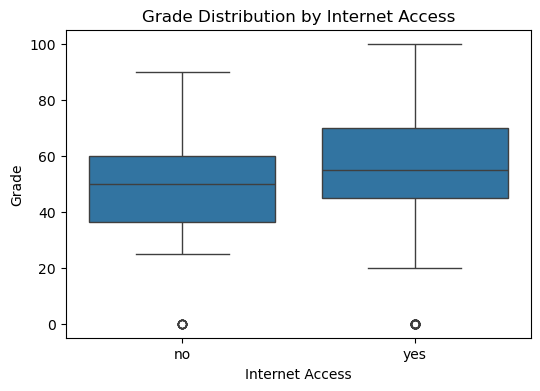

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x='internet', y='grade', data=df)
plt.title('Grade Distribution by Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Grade')
plt.show()

##### 
Siswa dengan akses internet cenderung memiliki median nilai yang lebih tinggi, Internet berpotensi mendukung proses belajar siswa

In [21]:
#Hitung Q1, Q3, dan IQR untuk kolom numerik
Q1 = df[numbers].quantile(0.25)
Q3 = df[numbers].quantile(0.75)
IQR = Q3 - Q1

#Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Data sebelum: ", df.shape[0], "baris")

#Hapus baris yang memiliki outlier di salah satu kolo numerik
df = df[~((df[numbers] < lower_bound) | (df[numbers] > upper_bound)).any(axis=1)]

print("Data sesudah: ", df.shape[0], "baris")

Data sebelum:  395 baris
Data sesudah:  331 baris


In [22]:
df = df[numbers]

In [23]:
df.head()

,age,mother_edu,father_edu,traveltime,studytime,freetime,health,absences,grade
0,18,4,4,2,2,3,3,6,30
1,17,1,1,1,2,3,3,4,30
2,15,1,1,1,2,3,3,10,50
3,15,4,2,1,3,2,5,2,75
4,16,3,3,1,2,3,5,4,50


### 3. Pemilihan Fitur

In [24]:
#Memisahkan variabel bebas (x) dan terikat (y)
X = df.drop("grade", axis=1)
y = df["grade"]

<Axes: >

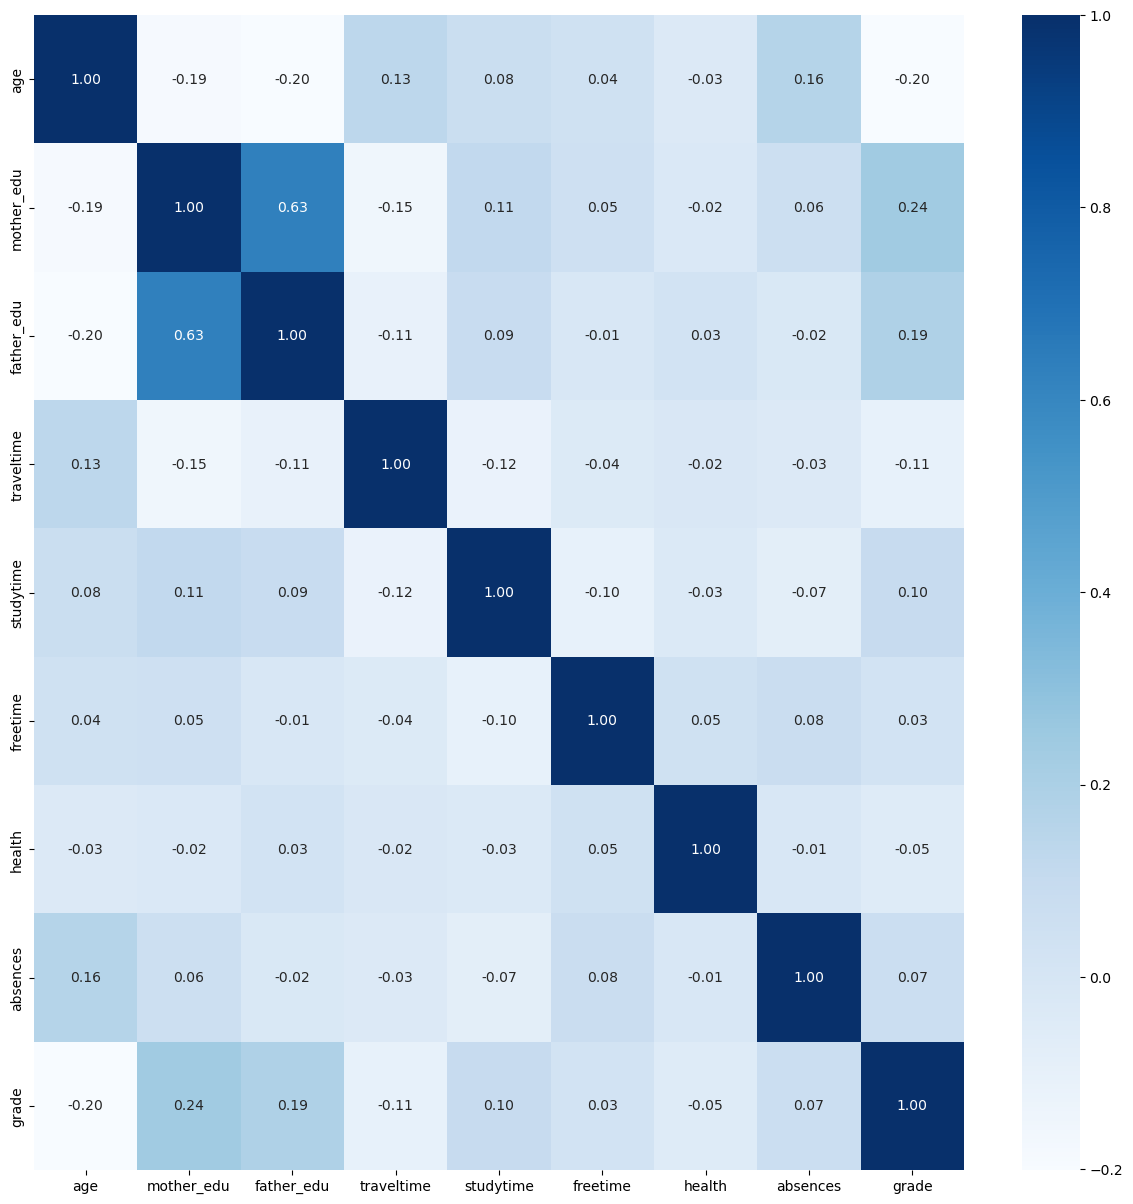

In [25]:
# Correlation Heatmap untuk melihat korelasi linear antara kolom-kolom numerik
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f', annot_kws={"size": 10})

In [26]:
#Mengecek nilai VIF setiap kolom
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(X.shape[1])]

vif_data

,feature,VIF
0,age,41.394669
1,mother_edu,12.232110
2,father_edu,11.097347
3,traveltime,6.503723
4,studytime,9.335435
5,freetime,15.586960
6,health,7.568305
7,absences,1.940951


### 4. Training & Test Split

In [27]:
#Membagi data latih dan uji (80% data latih, 20% data uji)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#hasil Split
print('Jumlah data train:', len(X_train))
print('Jumlah data test:', len(X_test))

Jumlah data train: 264
Jumlah data test: 67


In [28]:
X_train.head()

,age,mother_edu,father_edu,traveltime,studytime,freetime,health,absences
263,17,3,3,1,3,2,4,4
93,16,4,2,2,2,3,1,0
325,18,4,4,1,3,3,3,3
18,17,3,2,1,1,5,5,16
26,15,2,2,1,1,2,5,2


In [29]:
X_test.head()

,age,mother_edu,father_edu,traveltime,studytime,freetime,health,absences
27,15,4,2,1,1,2,1,4
368,18,2,3,2,1,2,4,0
87,15,4,2,1,3,3,1,4
262,18,3,2,1,3,3,3,1
62,16,1,2,1,2,4,1,4


### 5. Normalisasi dengan StandardScaler

In [30]:
#Normalisasi Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. Modeling

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Melihat koefisien masing-masing fitur
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
})

# Melihat nilai intercept
print("Intercept:", model.intercept_)

coef_df

Intercept: 94.43508460820377


,feature,coefficient
0,age,-3.685429
1,mother_edu,3.409669
2,father_edu,0.309519
3,traveltime,-3.550032
4,studytime,2.928881
5,freetime,1.654070
6,health,0.170741
7,absences,0.460230


### 7. Tuning Hyperparameter

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

#Pada Ridge
ridge = Ridge()
alphas = np.logspace(-3, 3, 20)  # λ dari 0.001 sampai 1000
param_grid = {'alpha': alphas}

grid = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)

print("Best alpha:", grid.best_params_)
print("Best score:", grid.best_score_)

Best alpha: {'alpha': np.float64(112.88378916846884)}
Best score: -472.4841633915722


In [34]:
df.shape

(331, 9)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

#Pada Lasso
Lasso = Lasso()
alphas = np.logspace(-3, 3, 20)  # λ dari 0.001 sampai 1000
param_grid = {'alpha': alphas}

grid = GridSearchCV(Lasso, param_grid, cv=10, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)

print("Best alpha:", grid.best_params_)
print("Best score:", grid.best_score_)

Best alpha: {'alpha': np.float64(0.3359818286283781)}
Best score: -477.7922314927544


In [36]:
df.shape

(331, 9)

### 6. Ridge

In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=112)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=112)

In [38]:
# Melihat koefisien masing-masing fitur
coef_df_ridge = pd.DataFrame({
    'feature': X.columns,
    'coefficient': ridge.coef_
})

coef_df_ridge

,feature,coefficient
0,age,-3.126375
1,mother_edu,2.635297
2,father_edu,1.068537
3,traveltime,-1.776311
4,studytime,1.316684
5,freetime,1.044000
6,health,0.199804
7,absences,1.530418


In [39]:
# Prediksi
y_pred = ridge.predict(X_test_scaled)

# MAE
mae_ridge = mean_absolute_error(y_test, y_pred)

# MAPE (gunakan rumus manual karena sklearn tidak menyediakan)
mape_ridge = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2_ridge = ridge.score(X_test_scaled, y_test)

print("MAE :", mae_ridge)
print("MAPE:", mape_ridge, "%")
print("RMSE:", rmse_ridge)
print("R2:", r2_ridge)

MAE : 19.025345287049717
MAPE: inf %
RMSE: 23.450576288954515
R2: 0.0005936389347733773


### 7. Lasso

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.33)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.33)

In [41]:
# Melihat koefisien masing-masing fitur
coef_df_lasso = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lasso.coef_
})

coef_df_lasso

,feature,coefficient
0,age,-4.214903
1,mother_edu,3.713373
2,father_edu,0.208910
3,traveltime,-1.977853
4,studytime,1.623856
5,freetime,1.097957
6,health,0.000000
7,absences,1.925557


In [42]:
# Prediksi
y_pred = lasso.predict(X_test_scaled)

# MAE
mae_lasso = mean_absolute_error(y_test, y_pred)

# MAPE (gunakan rumus manual karena sklearn tidak menyediakan)
mape_lasso = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSE
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2_lasso = lasso.score(X_test_scaled, y_test)

print("MAE :", mae_lasso)
print("MAPE:", mape_lasso, "%")
print("RMSE:", rmse_lasso)
print("R2:", r2_lasso)

MAE : 19.04317645215866
MAPE: inf %
RMSE: 23.589042196439546
R2: -0.011243362950943636


### Evaluasi

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prediksi
y_pred = model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# MAPE (gunakan rumus manual karena sklearn tidak menyediakan)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MAPE:", mape, "%")
print("RMSE:", rmse)
print("R2:", r2)

MAE : 19.185834989954202
MAPE: inf %
RMSE: 23.79630883145429
R2: -0.02909214426733797


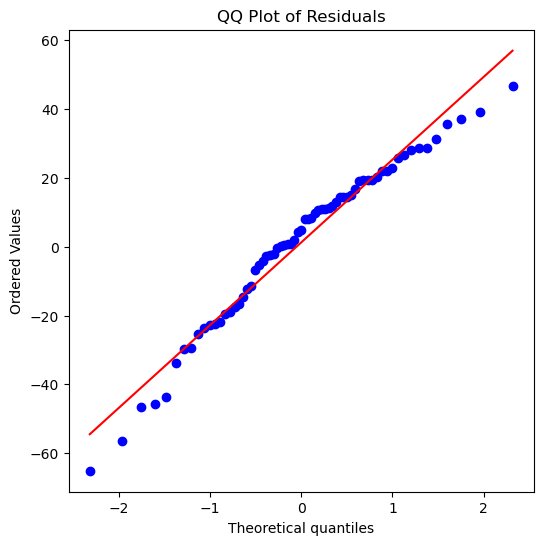

In [44]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Hitung residual
residual = y_test - y_pred

# QQ Plot
plt.figure(figsize=(6,6))
stats.probplot(residual, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

In [45]:
df.to_csv('MINI_PROJECT_5.csv', index=False)